# DrivenData
## Pump it up

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
drop_columns = ['num_private']
data = pd.read_csv('./DrivenData/training_values.csv', parse_dates=True)
ALPHANUMERIC_COLUMNS = data.select_dtypes(include=['object'])
ALPHANUMERIC_COLUMNS.info()
water = pd.get_dummies(ALPHANUMERIC_COLUMNS['water_quality'])
numerics = ['int16', 'int32','int64','float16','float32', 'float64']
NUMERIC_COLUMNS = data.select_dtypes(include=numerics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date_recorded          59400 non-null  object
 1   funder                 55765 non-null  object
 2   installer              55745 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   subvillage             59029 non-null  object
 6   region                 59400 non-null  object
 7   lga                    59400 non-null  object
 8   ward                   59400 non-null  object
 9   public_meeting         56066 non-null  object
 10  recorded_by            59400 non-null  object
 11  scheme_management      55523 non-null  object
 12  scheme_name            31234 non-null  object
 13  permit                 56344 non-null  object
 14  extraction_type        59400 non-null  object
 15  extraction_type_gro

In [82]:
import numpy as np
water.replace(0, np.nan)
print(water)
water.count()

       coloured  fluoride  fluoride abandoned  milky  salty  salty abandoned  \
0             0         0                   0      0      0                0   
1             0         0                   0      0      0                0   
2             0         0                   0      0      0                0   
3             0         0                   0      0      0                0   
4             0         0                   0      0      0                0   
...         ...       ...                 ...    ...    ...              ...   
59395         0         0                   0      0      0                0   
59396         0         0                   0      0      0                0   
59397         0         1                   0      0      0                0   
59398         0         0                   0      0      0                0   
59399         0         0                   0      0      1                0   

       soft  unknown  
0         1     

coloured              59400
fluoride              59400
fluoride abandoned    59400
milky                 59400
salty                 59400
salty abandoned       59400
soft                  59400
unknown               59400
dtype: int64

In [84]:
X = NUMERIC_COLUMNS.drop(columns=drop_columns, axis=1)
#X.info()

In [68]:
holdout = pd.read_csv('./DrivenData/test_values.csv')
y = pd.read_csv('./DrivenData/training_labels.csv')
y = y['status_group']
#pd.value_counts(y).plot.bar()

id                       1812
amount_tsh               1812
date_recorded            1812
funder                   1799
gps_height               1812
installer                1793
longitude                1812
latitude                 1812
wpt_name                 1812
basin                    1812
subvillage               1812
region                   1812
region_code              1812
district_code            1812
lga                      1812
ward                     1812
population               1812
public_meeting           1454
recorded_by              1812
scheme_management        1685
scheme_name               338
permit                   1812
construction_year        1812
extraction_type          1812
extraction_type_group    1812
extraction_type_class    1812
management               1812
management_group         1812
payment                  1812
payment_type             1812
water_quality            1812
quality_group            1812
quantity                 1812
quantity_g

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [47]:
print(data['num_private'].sum())

28164


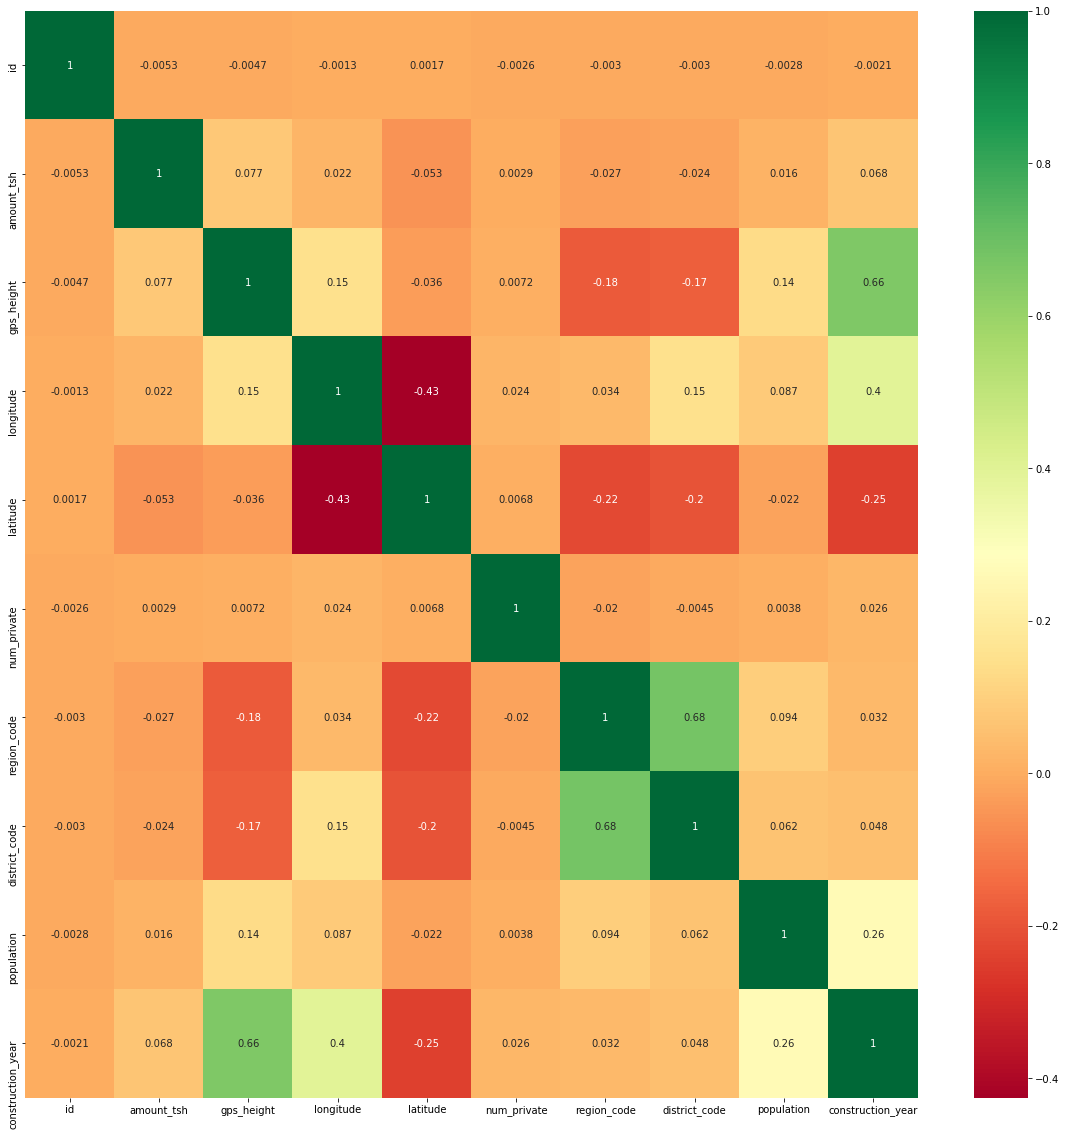

In [31]:
import seaborn as sns 
corr_data = data.corr()
top_corr_features = corr_data.index

In [32]:
print(top_corr_features)

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')


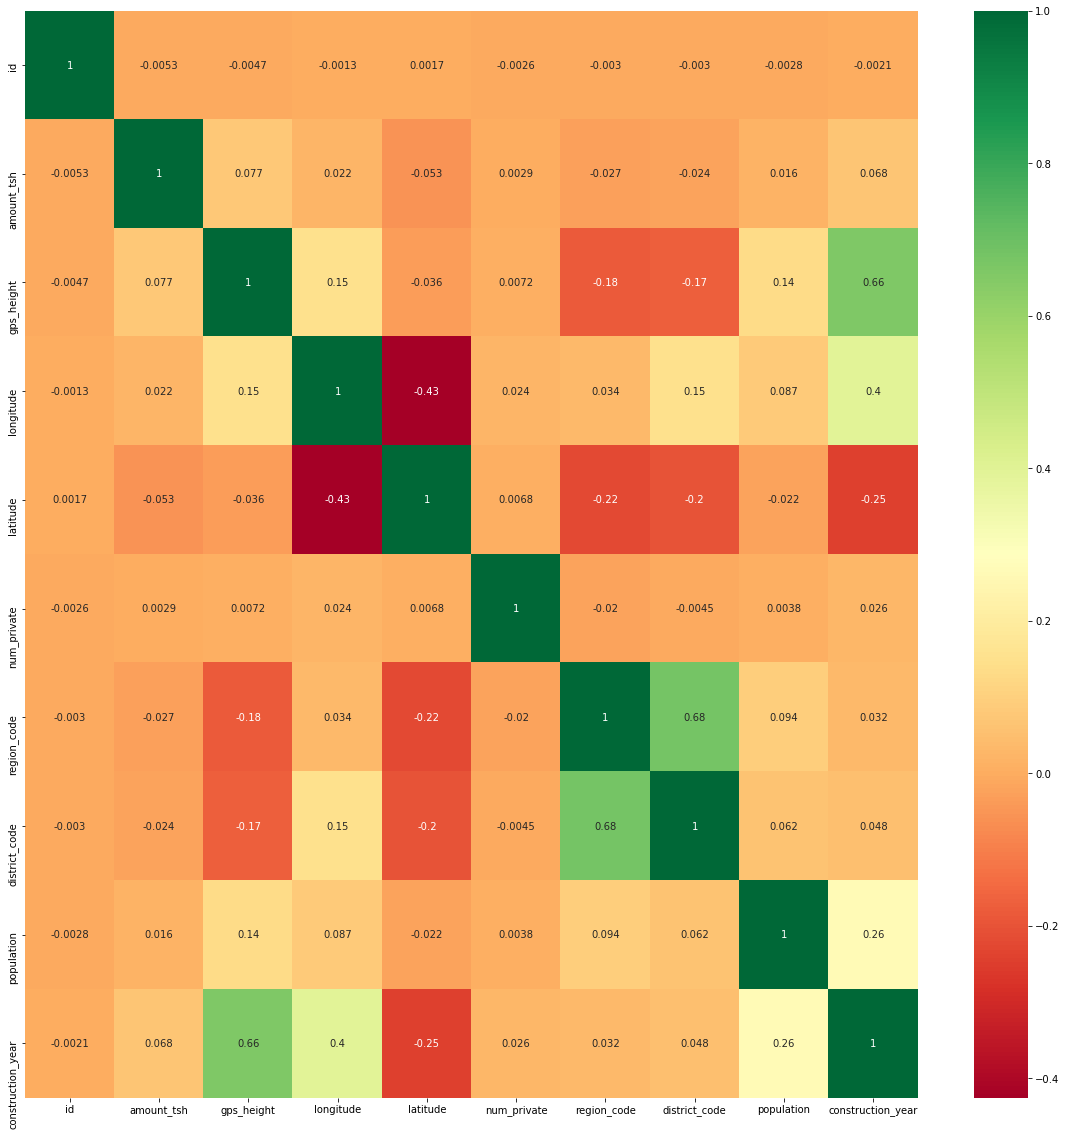

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_data,cmap="RdYlGn", annot=True)

In [ ]:
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
steps = [('normalize', Normalizer()), ('SelectKBest', SelectKBest(score_func=chi2, k=10))]
pl = Pipeline(steps)
#bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = pl.fit(NUMERIC_COLUMNS,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)

feature_scores = pd.concat([dfcolumns,dfscores], axis=1)
feature_scores.columns = ['Specs', 'Score']
print(feature_scores.nlargest(10,'Score'))

ValueError: Input X must be non-negative.

In [2]:


#ALPHANUMERIC_COLUMNS.describe()
#ALPHANUMERIC_COLUMNS.head()
#NUMERIC_COLUMNS.describe()

In [3]:
train_objs_num = len(data)
dataset_new = pd.concat(objs=[data, holdout], axis=0)
dataset_new = dataset_new.drop(['id'], axis=1)
dataset_new.fillna("", inplace=True)
dataset_new = pd.get_dummies(dataset_new)
train = copy.copy(dataset_new[:train_objs_num])
test = copy.copy(dataset_new[train_objs_num:])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

c:\users\jespe\.virtualenvs\machinelearningnotebook-qxxtnzx7\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [6]:
print("train score lin_svc:", svm.score(X_train,y_train))
print("test score lin_svc: ", svm.score(X_test,y_test))


train score lin_svc: 0.77125
test score lin_svc:  0.64875


In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2')
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
print("train score sgd: ", sgd.score(X_train,y_train) )
print("test score sgd: ", sgd.score(X_test,y_test) )

train score sgd:  0.541875
test score sgd:  0.52875
